## Problem Statement

##### Business problem overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, we analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

#### Understanding customer behaviour during churn

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase.

The ‘churn’ phase: In this phase, the customer is said to have churned.

You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.


## Importing and Reading Data

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing telecom_churn_data dataset
telecom_churn = pd.read_csv("telecom_churn_data.csv")

### Inspecting the Dataframe

In [3]:
#let's look at the head of the dataset
telecom_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
# Let's check the dimensions of the dataframe
telecom_churn.shape

(99999, 226)

In [5]:
# let's look at the statistical aspects of the dataframe
telecom_churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [6]:
# Let's see the type of each column
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
telecom_churn.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [8]:
#check for duplicates
duplicate=telecom_churn[telecom_churn.duplicated()]
duplicate

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


we can observe that there are no duplicates in the dataset

## deriving new features and handling missing values

In [9]:
# Renaming columns 
telecom_churn = telecom_churn.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)

In [10]:
#check for the unique values in the dataset with count=1
col_lst=[]
for i in telecom_churn.columns:
    if telecom_churn[i].nunique() == 1:
        col_lst.append(i)
col_lst

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [11]:
#dropping columns with single value or no variance
telecom_churn=telecom_churn.drop(col_lst,axis=1)

In [12]:
#check the shape of the new dataset
telecom_churn.shape

(99999, 210)

In [13]:
#retreiving the date columns
telecom_date_col=telecom_churn.columns[telecom_churn.columns.str.contains('date')]
date_col=telecom_date_col.to_list()
date_col

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [14]:
#dropping the date columns as they do not add for our analysis
telecom_churn=telecom_churn.drop(date_col,axis=1)

In [15]:
telecom_churn.shape

(99999, 202)

### Filter high value customers

###### deriving new feature total_rech_data_ using total_rech_data_ and av_rech_amt_data_ for 6,7,8,9

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [16]:
#creating a copy of original dataset
telecom_churn1=telecom_churn.copy()

In [17]:
#get all columns with recharge 
telecom_churn_rech_col=[telecom_churn1.columns[telecom_churn1.columns.str.contains('rech_amt|rech_data')]]
telecom_churn_rech_col

[Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
        'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
        'max_rech_amt_8', 'max_rech_amt_9', 'total_rech_data_6',
        'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
        'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
        'av_rech_amt_data_8', 'av_rech_amt_data_9'],
       dtype='object')]

In [18]:
#find missing values in the recharge columns
for i in telecom_churn_rech_col:
    print((telecom_churn1[i].isnull().mean())*100)

total_rech_amt_6       0.000000
total_rech_amt_7       0.000000
total_rech_amt_8       0.000000
total_rech_amt_9       0.000000
max_rech_amt_6         0.000000
max_rech_amt_7         0.000000
max_rech_amt_8         0.000000
max_rech_amt_9         0.000000
total_rech_data_6     74.846748
total_rech_data_7     74.428744
total_rech_data_8     73.660737
total_rech_data_9     74.077741
max_rech_data_6       74.846748
max_rech_data_7       74.428744
max_rech_data_8       73.660737
max_rech_data_9       74.077741
av_rech_amt_data_6    74.846748
av_rech_amt_data_7    74.428744
av_rech_amt_data_8    73.660737
av_rech_amt_data_9    74.077741
dtype: float64


In [19]:
#impute null values with 0 as the customers have not recharged is best imputed with 0
null_impute=['total_rech_data_6', 'total_rech_data_7','total_rech_data_8','total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8','max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8','av_rech_amt_data_9']
for i in null_impute:
    telecom_churn1[i]= telecom_churn1[i].fillna(0)

In [20]:
#check if the values are imputed correctly
for i in null_impute:
    print(i,' ',(telecom_churn1[i].isnull().mean())*100)

total_rech_data_6   0.0
total_rech_data_7   0.0
total_rech_data_8   0.0
total_rech_data_9   0.0
max_rech_data_6   0.0
max_rech_data_7   0.0
max_rech_data_8   0.0
max_rech_data_9   0.0
av_rech_amt_data_6   0.0
av_rech_amt_data_7   0.0
av_rech_amt_data_8   0.0
av_rech_amt_data_9   0.0


In [21]:
#deriving total_rech_amt_data_ feature by multiplying total_rech_data* av_rech_amt_data_
telecom_churn1["total_rech_amt_data_6"]=telecom_churn1["total_rech_data_6"]*telecom_churn1["av_rech_amt_data_6"]
telecom_churn1["total_rech_amt_data_7"]=telecom_churn1["total_rech_data_7"]*telecom_churn1["av_rech_amt_data_7"]
telecom_churn1["total_rech_amt_data_8"]=telecom_churn1["total_rech_data_8"]*telecom_churn1["av_rech_amt_data_8"]
telecom_churn1["total_rech_amt_data_9"]=telecom_churn1["total_rech_data_9"]*telecom_churn1["av_rech_amt_data_9"]

In [22]:
#dropping the columns which are accounted for
telecom_churn1=telecom_churn1.drop(['total_rech_data_6', 'total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8','av_rech_amt_data_9'] ,axis=1)

In [23]:
#check the shape after dropping
telecom_churn1.shape

(99999, 198)

In [24]:
#finding average of recharge of first two months of good phase
telecom_churn1["avg_amt_rech_6_7"]=(telecom_churn1["total_rech_amt_6"]+telecom_churn1["total_rech_amt_7"]+telecom_churn1["total_rech_amt_data_6"]+telecom_churn1["total_rech_amt_data_7"])/2

In [25]:
#finding the 70 percentile of the average X
X=telecom_churn1["avg_amt_rech_6_7"].quantile(0.7)
X

478.0

In [26]:
#filtering the customers based on X
telecom_churn1 = telecom_churn1[telecom_churn1['avg_amt_rech_6_7'] >= X]
telecom_churn1.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,avg_amt_rech_6_7
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,...,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,0.0,559.0
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,...,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,0.0,1185.0
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,0.0,696.0
21,7002124215,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,...,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,640.0
23,7000887461,74.350,193.897,366.966,811.480,48.96,50.66,33.58,15.74,85.41,...,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,252.0,583.0


In [27]:
#check the shape after filtering
telecom_churn1.shape

(30001, 199)

### Tag churners and remove attributes of the churn phase

Tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [28]:
#creating a new feature churn based on the churn phase(1/0)
telecom_churn1["churn"]=np.where((telecom_churn1['total_ic_mou_9']==0)& (telecom_churn1['total_og_mou_9']==0)&(telecom_churn1['vol_2g_mb_9']==0)&(telecom_churn1['vol_3g_mb_9']==0),1,0)

In [29]:
#list of columns having _9
telecom_churn_col_9=telecom_churn1.columns[telecom_churn1.columns.str.contains('_9')]
telecom_churn_col_9

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'max_rech_data_9', 'count_rech_2g_9',
       'count_rech_3g_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9',
       'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9',
       'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9',
       'total_rech_amt_data_9'],
      dtype='object')

In [30]:
telecom_churn1=telecom_churn1.drop(telecom_churn_col_9,axis=1)

In [31]:
telecom_churn1.shape

(30001, 151)

In [32]:
#check the churn rate 
telecom_churn1['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

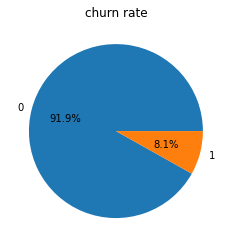

In [33]:
#check the churn rate
plt.title("churn rate")
plt.pie(telecom_churn1['churn'].value_counts(normalize=True),autopct='%1.1f%%',labels=['0','1'])
plt.show()

we see that people who churn is comparatively is very less, hence there comes the problem of class imbalance

### ckeck and handling missing values

In [34]:
#find the missing values in the dataset mv-missing values
mv=telecom_churn1.isnull().mean().reset_index()
mv[0]=mv[0]*100
mv=mv.rename(columns={"index":"Column Name",0:"% Missing Values"})
mv.sort_values(by="% Missing Values",ascending=False)

,Column Name,% Missing Values
126,night_pck_user_8,46.825106
120,arpu_3g_8,46.825106
123,arpu_2g_8,46.825106
141,fb_user_8,46.825106
111,count_rech_3g_8,46.825106
108,count_rech_2g_8,46.825106
118,arpu_3g_6,44.148528
121,arpu_2g_6,44.148528
124,night_pck_user_6,44.148528
109,count_rech_3g_6,44.148528


In [35]:
#drop columns with missing values more than 40
#after droppping store the dataset into telecom_churn1
drop_cols=list(mv[mv["% Missing Values"]>=40]["Column Name"])
telecom_churn1=telecom_churn1.drop(drop_cols,axis=1)

In [36]:
#check the shape of new dataframe
telecom_churn1.shape

(30001, 133)

In [37]:
#find the missing values in the dataset mv-missing values
mv=telecom_churn1.isnull().mean().reset_index()
mv[0]=mv[0]*100
mv=mv.rename(columns={"index":"Column Name",0:"% Missing Values"})
mv.sort_values(by="% Missing Values",ascending=False)

,Column Name,% Missing Values
66,loc_ic_mou_8,3.913203
18,loc_og_t2t_mou_8,3.913203
45,isd_og_mou_8,3.913203
36,std_og_t2m_mou_8,3.913203
48,spl_og_mou_8,3.913203
33,std_og_t2t_mou_8,3.913203
51,og_others_8,3.913203
30,loc_og_mou_8,3.913203
57,loc_ic_t2t_mou_8,3.913203
27,loc_og_t2c_mou_8,3.913203


In [38]:
#drop rows with missing values less than 4%
telecom_churn1=telecom_churn1.dropna(axis=0)

In [39]:
#find the missing values in the dataset mv-missing values
mv=telecom_churn1.isnull().mean().reset_index()
mv[0]=mv[0]*100
mv=mv.rename(columns={"index":"Column Name",0:"% Missing Values"})
mv.sort_values(by="% Missing Values",ascending=False)

,Column Name,% Missing Values
0,mobile_number,0.0
84,spl_ic_mou_8,0.0
98,max_rech_amt_7,0.0
97,max_rech_amt_6,0.0
96,total_rech_amt_8,0.0
95,total_rech_amt_7,0.0
94,total_rech_amt_6,0.0
93,total_rech_num_8,0.0
92,total_rech_num_7,0.0
91,total_rech_num_6,0.0


In [40]:
#drop mobile number as it doesnot add any information
telecom_churn1=telecom_churn1.drop('mobile_number',axis=1)

In [41]:
telecom_churn1.shape

(28504, 132)

### Outlier analysis

In [42]:
#categorizing the variables into continuos and categorical 
cat_cols=[]
con_cols=[]
for i in telecom_churn1:
    if telecom_churn1[i].nunique()<=30:
        cat_cols.append(i)
    else:
        con_cols.append(i)
print("cat_cols",cat_cols,'\n')
print("con_cols",con_cols)

cat_cols ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'churn'] 

con_cols ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og

In [43]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
cols=telecom_churn1[con_cols]
cols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_2g_7,sachet_2g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,avg_amt_rech_6_7
count,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,...,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000
mean,560.375015,570.628779,526.058843,265.250016,275.933639,244.727998,379.885653,389.853704,350.226224,16.267511,...,1.230283,1.088865,1234.055817,172.280825,179.720267,157.068192,444.792240,527.562376,469.506616,1153.967952
std,448.960314,480.075654,500.754116,458.723036,482.671988,464.022072,479.249454,502.604354,485.648594,75.510149,...,2.749901,2.561279,964.182647,422.692163,445.647191,414.405091,1417.124391,1481.601197,1644.912839,1364.087653
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,478.000000
25%,317.360500,322.602500,254.759000,20.140000,19.530000,14.840000,80.732500,80.352500,60.490000,0.000000,...,0.000000,0.000000,472.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,604.000000
50%,485.169000,488.899500,442.791000,89.985000,89.910000,74.085000,231.550000,231.825000,199.875000,0.000000,...,0.000000,0.000000,876.000000,0.000000,0.000000,0.000000,92.000000,100.000000,25.000000,801.500000
75%,698.914000,704.999500,672.453250,298.760000,304.895000,257.415000,494.372500,506.467500,457.432500,0.000000,...,1.000000,1.000000,1815.000000,139.397500,138.992500,96.437500,392.000000,575.000000,342.000000,1208.500000
90%,987.580200,1001.338500,991.085300,760.844000,801.711000,688.281000,898.931000,931.197000,844.924000,28.624000,...,5.000000,4.000000,2816.700000,590.464000,614.064000,526.659000,1051.400000,1374.000000,1118.800000,1991.000000
95%,1232.633400,1268.472050,1267.392650,1135.715000,1206.173000,1101.550000,1256.088500,1292.275500,1187.343500,86.672500,...,7.000000,6.000000,3154.000000,948.150000,985.739500,878.063500,2025.000000,2424.000000,2268.000000,2798.925000
99%,1955.145730,1999.462350,1989.922110,2146.076400,2220.474500,2175.252400,2301.026700,2434.539600,2219.376900,342.417200,...,12.000000,12.000000,3651.000000,1962.938400,2075.247600,1933.961600,5129.730000,6219.160000,5749.820000,6084.265000


we found there are few outliers, we can cap the outliers

In [44]:
#capping the outliers with iqr value
for i in cols:
    q1=telecom_churn1[i].describe()["25%"]
    q3=telecom_churn1[i].describe()["75%"]
    iqr=q3-q1
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    telecom_churn1[i]=np.where(telecom_churn1[i]<lower_bound,lower_bound,telecom_churn1[i])
    telecom_churn1[i]=np.where(telecom_churn1[i]>upper_bound,upper_bound,telecom_churn1[i])

### Univariate Analysis

In [45]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(15,15))
    df = telecom_churn1
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()

In [46]:
#sns.barplot(x='churn',y='dec_vbc_action',data=telecom_churn1)

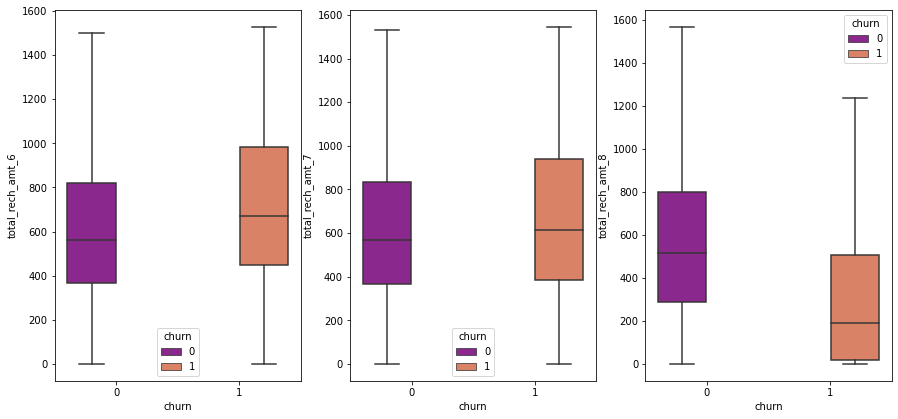

In [47]:
plot_box_chart('total_rech_amt')

we see there is a decrease in the recharge amount in the action phase for the churn customers

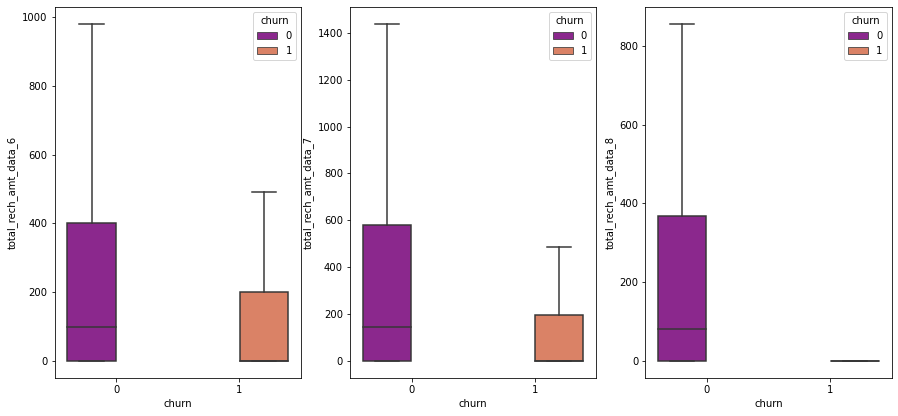

In [48]:
plot_box_chart('total_rech_amt_data')

we see there is a decrease in the data recharge in the action phase for the churn customers

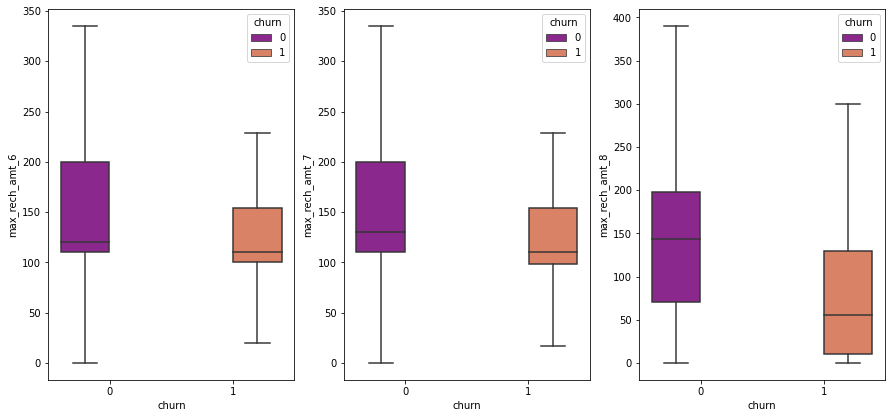

In [49]:
plot_box_chart('max_rech_amt')

we see there is a decrease in the max_rech amt in the action phase for the churn customers

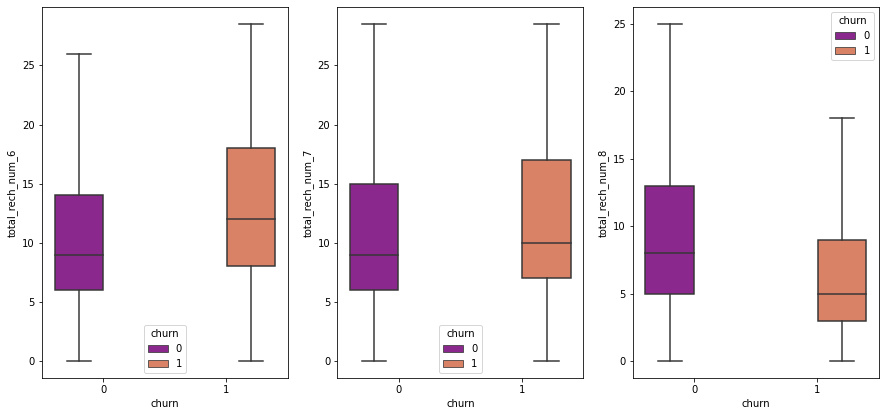

In [50]:
plot_box_chart('total_rech_num')

we see there is a decrease in the num of recharges in the action phase for the churn customers

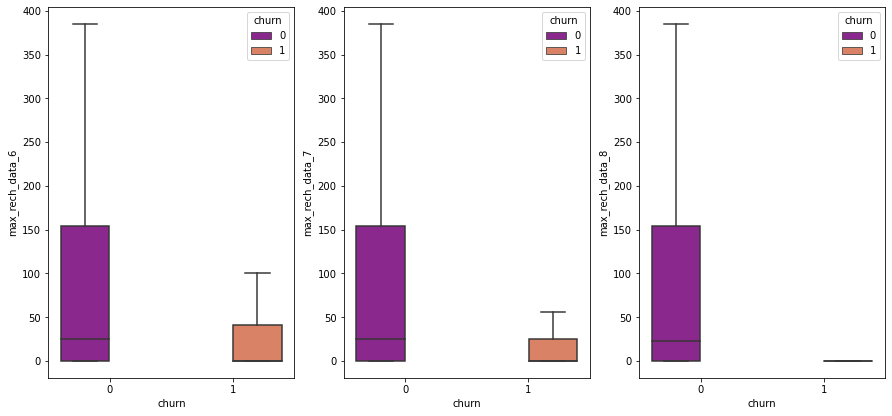

In [51]:
plot_box_chart('max_rech_data')

we see there is a decrease in the data recharge in the action phase for the churn customers

In [52]:
def plot_mean_bar_chart(telecom_churn1,columns_list):
    telecom_churn1_0 = telecom_churn1[telecom_churn1.churn==0].filter(columns_list)
    telecom_churn1_1 = telecom_churn1[telecom_churn1.churn==1].filter(columns_list)

    mean_telecom_churn1_0 = pd.DataFrame([telecom_churn1_0.mean()],index={'Non Churn'})
    mean_telecom_churn1_1 = pd.DataFrame([telecom_churn1_1.mean()],index={'Churn'})

    frames = [mean_telecom_churn1_0, mean_telecom_churn1_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    

In [53]:
#collecting all monthlysubscription coluumns
monthly_subcription_2g_3g = telecom_churn1.columns[telecom_churn1.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

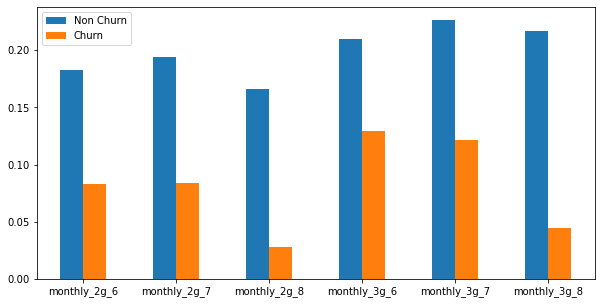

In [54]:
#checking the churn rate for monthly subscriptions
plot_mean_bar_chart(telecom_churn1, monthly_subcription_2g_3g)

 we can see a drop in monthly subscription for churned customers in 8th Month.

In [55]:
#collecting all monthlysubscription coluumns
sc_2g_3g = telecom_churn1.columns[telecom_churn1.columns.str.contains('sachet_2g|sachet_3g',regex=True)]
sc_2g_3g.tolist()

['sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8']

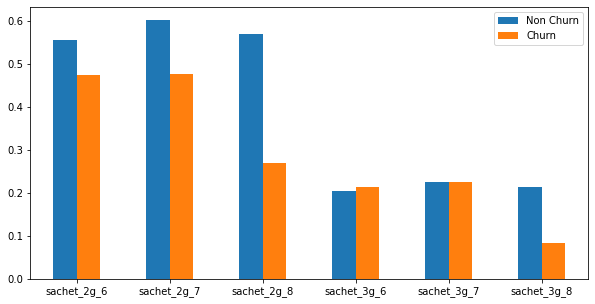

In [56]:
#checking the churn rate for monthly subscriptions
plot_mean_bar_chart(telecom_churn1, sc_2g_3g)

We can see the drop in sachet services in 8th month for churned cutsomers

#### Deriving new feature dec_mou_action

This indicates the decrease of mou in action phase than good phase.

In [57]:
# Avg. mou at good phase

# We are taking average because there are two months(6 and 7) in good phase

telecom_churn1['avg_mou_good'] = (telecom_churn1['total_og_mou_6'] + telecom_churn1['total_og_mou_7'] + telecom_churn1['total_ic_mou_6'] +  telecom_churn1['total_ic_mou_7'])/2

In [58]:
# Total mou at good phase incoming and outgoing
telecom_churn1['total_mou_action'] = telecom_churn1['total_og_mou_8']+ telecom_churn1['total_ic_mou_8']

In [59]:
# Difference avg_mou_good and avg_mou_action
telecom_churn1['diff_mou'] = telecom_churn1['avg_mou_good'] - telecom_churn1['total_mou_action']

In [60]:
# Checking whether the mou has decreased in action phase
telecom_churn1['dec_mou_action'] = np.where((telecom_churn1['diff_mou'] < 0), 1, 0)

#### deriving new feature dec_rech_num_action

this indicates the decrease of recharges in the action phase than the good phase

In [61]:
# Avg. rech num at good phase

# We are taking average because there are two months(6 and 7) in good phase

telecom_churn1['avg_rech_num_good'] = (telecom_churn1['total_rech_num_6'] + telecom_churn1['total_rech_num_7'])/2

In [62]:
# Difference avg_rech_num_good and total_rech_num_action
telecom_churn1['diff_rech_num'] = telecom_churn1['avg_rech_num_good'] - telecom_churn1['total_rech_num_8']

In [63]:
# Checking whether the diff_rech_num has decreased in action phase
telecom_churn1['dec_rech_num_action'] = np.where((telecom_churn1['diff_rech_num'] < 0), 1, 0)

#### deriving new feature dec_rech_amt_action

this indicates the decrease of recharges in the action phase than the good phase

In [64]:
# Avg. rech num at good phase

# We are taking average because there are two months(6 and 7) in good phase

telecom_churn1['avg_rech_amt_good'] = (telecom_churn1['total_rech_amt_6'] + telecom_churn1['total_rech_amt_7'])/2

In [65]:
# Difference avg_rech_num_good and total_rech_num_action
telecom_churn1['diff_rech_amt'] = telecom_churn1['avg_rech_amt_good'] - telecom_churn1['total_rech_amt_8']

In [66]:
# Checking whether the diff_rech_num has decreased in action phase
telecom_churn1['dec_rech_amt_action'] = np.where((telecom_churn1['diff_rech_amt'] < 0), 1, 0)

#### deriving new feature dec_arpu_action

this indicates the decrease of arpu in the action phase than the good phase

In [67]:
# Avg. arpu at good phase

# We are taking average because there are two months(6 and 7) in good phase

telecom_churn1['avg_arpu_good'] = (telecom_churn1['arpu_6'] + telecom_churn1['arpu_7'])/2

In [68]:
# Difference avg_arpu_good and arpu_action
telecom_churn1['diff_arpu'] = telecom_churn1['avg_arpu_good'] - telecom_churn1['arpu_8']

In [69]:
# Checking whether the arpu has decreased in action phase
telecom_churn1['dec_arpu_action'] = np.where((telecom_churn1['diff_arpu'] < 0), 1, 0)

#### deriving new feature dec_vbc_action

this indicates the decrease of vbc in the action phase than the good phase

In [70]:
# Avg. vbc at good phase

# We are taking average because there are two months(6 and 7) in good phase

telecom_churn1['avg_vbc_good'] = (telecom_churn1['vbc_3g_6'] + telecom_churn1['vbc_3g_7'])/2

In [71]:
# Difference avg_vbc_good and vbc_action
telecom_churn1['diff_vbc'] = telecom_churn1['avg_vbc_good'] - telecom_churn1['vbc_3g_8']

In [72]:
# Checking whether the vbc has decreased in action phase
telecom_churn1['dec_vbc_action'] = np.where((telecom_churn1['diff_vbc'] < 0), 1, 0)


In [73]:
telecom_churn1.shape

(28504, 148)

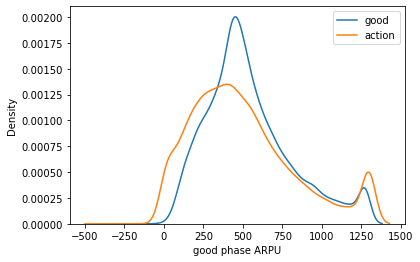

In [74]:
# Distribution plot
ax = sns.distplot(telecom_churn1['avg_arpu_good'],label='good',hist=False)
ax = sns.distplot(telecom_churn1['arpu_8'],label='action',hist=False)
ax.set(xlabel='good phase ARPU')
ax.legend()

avg_revenue is mostly densed from 250-750 in good phase,

we can see a drop in action phase

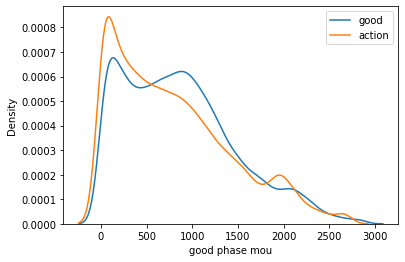

In [75]:
# Distribution plot
ax = sns.distplot(telecom_churn1['avg_mou_good'],label='good',hist=False)
ax = sns.distplot(telecom_churn1['total_mou_action'],label='action',hist=False)
ax.set(xlabel='good phase mou')
ax.legend()

avg_mou is mostly densed from 0-1500 in good phase,

we can see a drop in action phase

In [76]:
# Creating churn telecom_churn1frame
telecom_churn1_churn = telecom_churn1[telecom_churn1['churn'] == 1]
# Creating not churn telecom_churn1frame
telecom_churn1_non_churn = telecom_churn1[telecom_churn1['churn'] == 0]

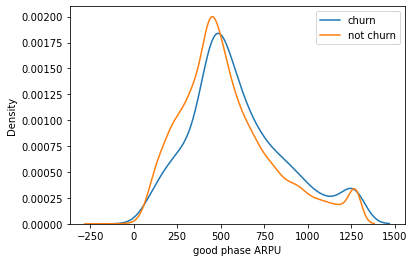

In [77]:
# Distribution plot
ax = sns.distplot(telecom_churn1_churn['avg_arpu_good'],label='churn',hist=False)
ax = sns.distplot(telecom_churn1_non_churn['avg_arpu_good'],label='not churn',hist=False)
ax.set(xlabel='good phase ARPU')
ax.legend()

avg_revenue is mostly densed from 250-1000 in good phase,

we can see a drop in action phase

### Bivariate analysis

##### analysis of decrease in recharge amount and recharge num in action phase

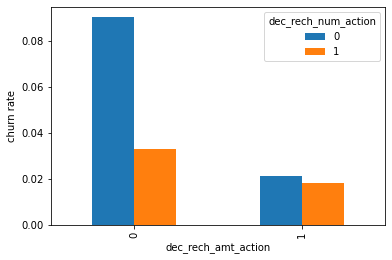

In [78]:
#analysis of decrease in recharge amount and recharge num in action phase
telecom_churn1.pivot_table(values='churn', index='dec_rech_amt_action', columns='dec_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

we can see there is a decrease in the recharge amount and recharge num in the action for churn customers

##### analysis of decrease in recharge amount and vbc in action phase

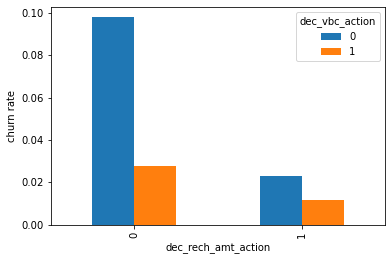

In [79]:
#analysis of decrease in recharge amount and recharge num in action phase
telecom_churn1.pivot_table(values='churn', index='dec_rech_amt_action', columns='dec_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

we can see there is a decrease in the recharge amount and vbc in the action for churn customers

In [80]:
#dropping the columns which are accounted for
telecom_churn1=telecom_churn1.drop(['total_mou_action','avg_mou_good','diff_mou','avg_rech_num_good','diff_rech_num','avg_rech_amt_good',
                 'diff_rech_amt','avg_arpu_good','diff_arpu','avg_vbc_good','diff_vbc','avg_amt_rech_6_7'], axis=1)

In [81]:
telecom_churn1.shape

(28504, 136)

In [82]:
# Create correlation matrix
corr_matrix = telecom_churn1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
to_drop

['loc_og_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

In [83]:
#dropping highly correlated features
telecom_churn1=telecom_churn1.drop(to_drop,axis=1)

In [84]:
telecom_churn1.shape

(28504, 126)

In [85]:
#deriving new features by averaging the good phase features
col_list = telecom_churn1.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    telecom_churn1[avg_col_name] = (telecom_churn1[col_6]  + telecom_churn1[col_7])/ 2

In [86]:
#dropping the columns already accounted for
col_list_to_drop = telecom_churn1.filter(regex='_6|_7')
telecom_churn_final=telecom_churn1.drop(col_list_to_drop,axis=1)
print (telecom_churn_final.shape)

(28504, 86)


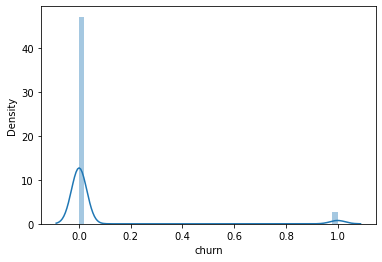

In [87]:
# Distribution of target variable

sns.distplot(telecom_churn_final['churn'])
plt.show()

Observation Though the varible is not skwed it is higly imbalanced, the number of non-churners in the dataset is around 94% We will handle this imbalance using SMOTE algorithm


#### Dealing with telecom_churn_final imbalance
We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [88]:
y = telecom_churn_final['churn']
X = telecom_churn_final.drop('churn', axis=1)

In [89]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [90]:
# Instantiate SMOTE
sm = SMOTE(random_state=45)

In [91]:
# Fittign SMOTE to the train set
X_res, y_res = sm.fit_resample(X, y)

In [92]:
y_res.value_counts()

1    26908
0    26908
Name: churn, dtype: int64

### Train-Test Split

In [93]:
# Import library
from sklearn.model_selection import train_test_split

In [94]:
# Splitting telecom_churn_final into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.8, test_size=0.2, random_state=45)

### Feature Scaling

In [95]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [96]:
# Instantiate the Scaler
scaler = StandardScaler()

In [97]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('dec_mou_action')
cols_scale.remove('dec_rech_num_action')
cols_scale.remove('dec_rech_amt_action')
cols_scale.remove('dec_arpu_action')
cols_scale.remove('dec_vbc_action')

In [98]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [99]:
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,...,avg_last_day_rch_amt_av67,avg_max_rech_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
28325,0.349745,2.310386,0.200620,0.0,0.0,-0.444069,0.084640,-0.533264,2.066913,2.103529,...,0.748415,-0.418526,-0.667746,-0.556616,-0.412969,0.591049,-0.345342,-0.244764,-0.555137,-0.646295
28011,-0.394052,-0.599600,-0.038080,0.0,0.0,-0.408966,0.104995,2.401953,-0.568410,-0.470566,...,-1.407914,0.524646,-0.601960,-0.181809,1.146055,-0.645567,-0.345342,-0.244764,0.674449,-0.424282
35274,-0.674895,-0.583134,-0.621998,0.0,0.0,-0.514427,-0.540729,-0.157142,-0.568410,-0.376195,...,-0.063451,-0.737165,-0.667746,-0.556616,-0.412969,-0.645567,-0.345342,-0.244764,-0.555137,-0.721300
10070,1.772847,-0.453918,0.167895,0.0,0.0,0.391002,0.791728,0.794431,-0.568410,-0.612024,...,1.533318,-0.157242,-0.667004,0.205376,-0.412969,-0.645567,-0.345342,0.348597,-0.555137,-0.584792
28091,-1.025599,-0.715193,-0.724382,0.0,0.0,-0.587707,-0.512896,-0.533264,2.066913,-0.612024,...,-0.079616,1.225652,2.406339,-0.556616,4.264102,-0.645567,-0.345342,-0.244764,-0.555137,0.433767


##### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [100]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,...,avg_last_day_rch_amt_av67,avg_max_rech_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
22422,0.306521,-0.715547,-0.232184,0.0,0.0,-0.589035,0.522844,0.047230,2.066913,-0.612024,...,-0.976648,-0.628828,-0.056693,0.117942,-0.412969,-0.027259,-0.345342,-0.244764,0.693896,-0.695798
12624,-0.675838,-0.619557,0.026349,0.0,0.0,-0.229467,0.933755,2.663176,-0.568410,-0.612024,...,0.317149,-0.737165,-0.667746,-0.556616,-0.412969,-0.645567,-0.345342,-0.244764,-0.555137,-0.721300
37551,0.673084,-0.485746,0.447567,0.0,0.0,0.183355,1.844218,2.599587,-0.568410,-0.555633,...,0.788145,0.239811,-0.580582,-0.089034,0.603877,-0.430539,-0.345342,-0.038412,0.517349,-0.253443
50776,-1.017795,-0.716496,-0.707020,0.0,0.0,-0.660000,-0.691613,-0.533264,-0.568410,-0.612024,...,0.996795,0.503087,1.627919,-0.556616,0.890276,0.175625,-0.345342,-0.147415,-0.555137,-0.392441
33446,0.618102,-0.018038,-0.394382,0.0,0.0,-0.607976,-0.452754,-0.533264,-0.568410,-0.431085,...,0.344175,1.414996,0.553560,-0.433617,0.109898,0.080223,1.054481,-0.244764,-0.249589,1.144535


## Model with PCA

In [101]:
#Import PCA
from sklearn.decomposition import PCA

In [102]:
# Instantiate PCA
pca = PCA(random_state=42)

In [103]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [104]:
# Principal components
pca.components_

array([[ 2.23794857e-01,  1.34514573e-01,  1.93471045e-01, ...,
        -2.37456529e-02,  5.70936274e-02, -2.95255350e-02],
       [-4.04589472e-02, -1.50308281e-01, -1.05208805e-01, ...,
         6.32805555e-02,  1.92166317e-01,  1.94995155e-01],
       [ 1.32330335e-01,  1.14190331e-01,  5.52046062e-02, ...,
         9.68440787e-02,  1.33760919e-01,  1.87076992e-01],
       ...,
       [ 0.00000000e+00, -3.21676783e-17, -3.59638701e-17, ...,
         4.18704809e-17,  5.11260487e-17, -4.32158671e-18],
       [-0.00000000e+00, -3.35668993e-16,  1.23460569e-16, ...,
         1.40512602e-16, -2.77555756e-17, -1.38777878e-17],
       [ 0.00000000e+00, -1.58835618e-17, -1.54728996e-16, ...,
         2.25514052e-17, -4.16333634e-17, -1.38777878e-16]])

In [105]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.16624931 0.32391271 0.40029178 0.45889517 0.50354119 0.54334845
 0.57972373 0.60677855 0.6326681  0.65485235 0.67587167 0.69566181
 0.71405626 0.73167131 0.74803795 0.76208215 0.77556249 0.78847212
 0.80112538 0.81248141 0.82323459 0.83296536 0.84230102 0.85129254
 0.86005227 0.86861963 0.87673986 0.88467925 0.89159827 0.89842473
 0.90492769 0.9109113  0.91671871 0.92226637 0.92768326 0.93273278
 0.93719145 0.9414007  0.94534394 0.94923812 0.95296427 0.95663674
 0.9599152  0.96305696 0.96597385 0.96874135 0.97142565 0.97387636
 0.97623739 0.97856377 0.98076448 0.98258647 0.98422953 0.98584568
 0.98738692 0.98876714 0.99004807 0.99129722 0.99244552 0.99353932
 0.9945306  0.99547459 0.99630837 0.9970571  0.99761464 0.99814554
 0.99862985 0.99905768 0.99948014 0.99980261 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]


Text(0, 0.5, 'Cumulative Variance')

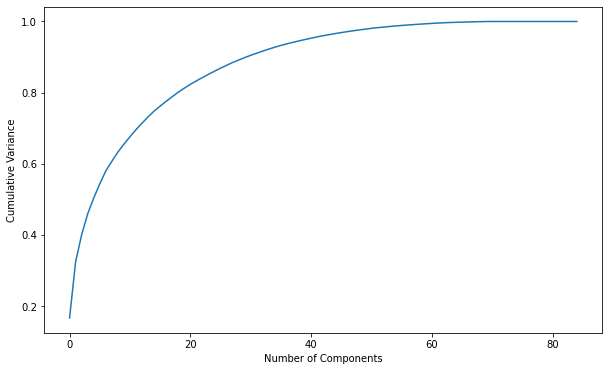

In [106]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

We can see that 60 components explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.

#### Performing PCA with 60 components

In [107]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [108]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [109]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

#### Applying transformation on the test set
We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [110]:
X_test_pca = pca_final.transform(X_test)

#### Emphasize Sensitivity/Recall than Accuracy
We are more focused on higher Sensitivity/Recall score than the accuracy.

Beacuse we need to care more about churn cases than the not churn cases. The main goal is to reatin the customers, who have the possiblity to churn. There should not be a problem, if we consider few not churn customers as churn customers and provide them some incentives for retaining them. Hence, the sensitivity score is more important here.

### Logistic regression with PCA

In [111]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [112]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

##### Tuning hyperparameter C
C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [113]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [114]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

In [115]:
# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

In [116]:
# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

In [117]:
# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [118]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.442329,0.073155,0.008792,0.001719,0.01,{'C': 0.01},0.871649,0.865138,0.869972,0.858453,...,0.867340,0.005031,6,0.865649,0.868060,0.868410,0.869563,0.866694,0.867675,0.001365
1,0.429140,0.036423,0.007791,0.001471,0.1,{'C': 0.1},0.875511,0.868578,0.873480,0.862920,...,0.871271,0.004918,5,0.869886,0.872576,0.872443,0.874453,0.870800,0.872032,0.001578
2,0.476309,0.027483,0.008391,0.002244,1,{'C': 1},0.875965,0.869037,0.874181,0.862450,...,0.871638,0.005302,1,0.870582,0.872807,0.873308,0.874511,0.870800,0.872402,0.001504
3,0.489300,0.067042,0.008193,0.001600,10,{'C': 10},0.875965,0.869037,0.873948,0.862450,...,0.871591,0.005280,2,0.870698,0.872807,0.873365,0.874568,0.870973,0.872482,0.001463
4,0.470313,0.042208,0.008991,0.001789,100,{'C': 100},0.875965,0.869037,0.873948,0.862450,...,0.871591,0.005280,2,0.870698,0.872807,0.873423,0.874568,0.870973,0.872494,0.001470
5,0.455124,0.030760,0.009390,0.001359,1000,{'C': 1000},0.875965,0.869037,0.873948,0.862450,...,0.871591,0.005280,2,0.870698,0.872749,0.873423,0.874568,0.870973,0.872482,0.001468


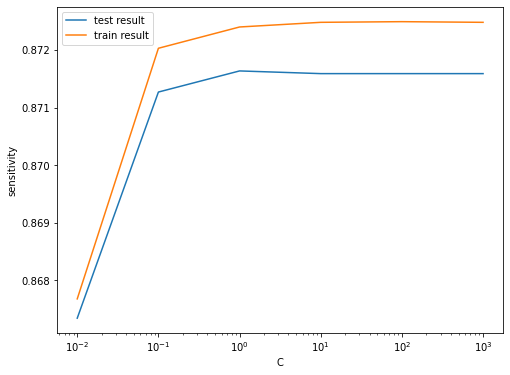

In [119]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [120]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.871637652783195 at C = 1


##### Logistic regression with optimal C

In [121]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [122]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

##### Prediction on the train set

In [123]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [124]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17248  4171]
 [ 2754 18879]]


In [125]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [126]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8391480070612283
Sensitivity:- 0.8726944945222577
Specificity:- 0.8052663523040291


##### Prediction on the test set

In [127]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [128]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4435 1054]
 [ 688 4587]]


In [129]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [130]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8381642512077294
Sensitivity:- 0.8695734597156398
Specificity:- 0.8079795955547459


#### *Model summary*

Train set

Accuracy = 0.83

Sensitivity = 0.87

Specificity = 0.80

Test set

Accuracy = 0.83

Sensitivity = 0.86

Specificity = 0.80

Overall, the model is performing well in the test set, what it had learnt from the train set.

### Decision tree with PCA

In [131]:
#Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#### Hyperparameter tuning

In [132]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

In [133]:
# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [134]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.008564,0.070915,0.009193,1.165035e-03,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.747631,0.773977,0.846545,0.820388,0.801664,0.798041,0.034599,5
1,2.033145,0.100855,0.009994,1.672288e-03,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.747631,0.773977,0.846545,0.820388,0.801664,0.798041,0.034599,5
2,2.067526,0.030703,0.009393,1.355644e-03,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.748556,0.774902,0.847007,0.819001,0.798428,0.797579,0.034118,7
3,1.813681,0.019640,0.008395,4.899792e-04,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.748556,0.774902,0.847007,0.819001,0.798428,0.797579,0.034118,7
4,3.073106,0.010801,0.008395,4.894927e-04,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.843772,0.852785,0.844696,0.829404,0.829172,0.839966,0.009265,1
5,3.071336,0.021038,0.008795,3.996850e-04,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.843772,0.852785,0.844696,0.830097,0.828017,0.839873,0.009395,2
6,2.933391,0.039660,0.008795,3.996373e-04,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.824821,0.816732,0.827132,0.815072,0.800046,0.816761,0.009537,3
7,2.941986,0.040622,0.008995,2.780415e-07,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.823896,0.817657,0.827132,0.815072,0.800046,0.816761,0.009397,3


In [135]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.8399657303467428
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


#### Model with optimal hyperparameters

In [136]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [137]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [138]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17833  3586]
 [ 2691 18942]]


In [139]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [140]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8541995726098671
Sensitivity:- 0.8756067119678269
Specificity:- 0.8325785517531163


##### Prediction on the test set

In [141]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [142]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4423 1066]
 [ 818 4457]]


In [143]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [144]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8249721293199554
Sensitivity:- 0.8449289099526066
Specificity:- 0.8057934049918017


#### *Model summary*

Train set

Accuracy = 0.85

Sensitivity = 0.87

Specificity = 0.83

Test set

Accuracy = 0.82

Sensitivity = 0.84

Specificity = 0.80

overall it is performing well on the test set as it learned from the train test

### Random forest with PCA

In [145]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

#### Hyperparameter tuning

In [146]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [147]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8228420961733334 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 200}


##### Model with optimal hyperparameters

In [148]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [149]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

#### Prediction on the train set

In [150]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [151]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18137  3282]
 [ 4632 17001]]


In [152]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [153]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8161757874198643
Sensitivity:- 0.78588267924005
Specificity:- 0.8467715579625567


### Prediction on the test set

In [154]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [155]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4675  814]
 [1182 4093]]


In [156]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [157]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8145670754366406
Sensitivity:- 0.7759241706161137
Specificity:- 0.8517034068136272


#### *Model summary*

Train set

Accuracy = 0.81

Sensitivity = 0.79

Specificity = 0.84

Test set

Accuracy = 0.81

Sensitivity = 0.78

Specificity = 0.85

We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

### Final conclusion with PCA

After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the classic Logistic regression or the SVM models preforms well. For both the models the sensitivity was approx 81%. Also we have good accuracy of apporx 85%.

## Without PCA

### Logistic regression with No PCA

In [158]:
# Importing stats model
import statsmodels.api as sm

In [159]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
# Fit the model
log_no_pca = log_no_pca.fit().summary()
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43052
Model:                            GLM   Df Residuals:                    42980
Model Family:                Binomial   Df Model:                           71
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15696.
Date:                Tue, 14 Feb 2023   Deviance:                       31393.
Time:                        14:38:22   Pearson chi2:                 1.62e+05
No. Iterations:                   100   Pseudo R-squ. (CS):             0.4816
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.6349      0.025     24.979      0.000       0.585       0.685
arpu_8                           1.0451      0.050     20.860      0.000       0.947       1.143
onnet_mou_8                      0.0722      0.051      1.413      0.158      -0.028       0.172
offnet_mou_8                     0.0208      0.051      0.411      0.681      -0.079       0.120
roam_ic_mou_8                 2.402e-16   9.95e-17      2.415      0.016    4.52e-17    4.35e-16
roam_og_mou_8                -2.975e-16   9.82e-17     -3.031      0.002    -4.9e-16   -1.05e-16
loc_og_t2t_mou_8                -0.2903      0.040     -7.262      0.000      -0.369      -0.212
loc_og_t2m_mou_8                -0.2026      0.044     -4.647      0.000      -0.288      -0.117
loc_og_t2f_mou_8                -0.0857      0.025     -3.377      0.001      -0.136      -0.036
loc_og_t2c_mou_8                -0.0404      0.017     -2.343      0.019      -0.074      -0.007
std_og_t2t_mou_8                -0.3027      0.042     -7.175      0.000      -0.385      -0.220
std_og_t2m_mou_8                -0.0858      0.041     -2.079      0.038      -0.167      -0.005
std_og_t2f_mou_8              4.017e-15   1.88e-16     21.340      0.000    3.65e-15    4.39e-15
std_og_mou_8                    -0.0751      0.067     -1.121      0.262      -0.206       0.056
isd_og_mou_8                  1.816e-15   8.68e-17     20.917      0.000    1.65e-15    1.99e-15
spl_og_mou_8                     0.0316      0.020      1.608      0.108      -0.007       0.070
og_others_8                  -1.156e-15   9.47e-17    -12.210      0.000   -1.34e-15    -9.7e-16
total_og_mou_8                  -0.3914      0.064     -6.075      0.000      -0.518      -0.265
loc_ic_t2t_mou_8                -0.2552      0.034     -7.478      0.000      -0.322      -0.188
loc_ic_t2m_mou_8                -0.6680      0.038    -17.419      0.000      -0.743      -0.593
loc_ic_t2f_mou_8                -0.0426      0.027     -1.595      0.111      -0.095       0.010
std_ic_t2t_mou_8                -0.0858      0.027     -3.125      0.002      -0.140      -0.032
std_ic_t2m_mou_8                -0.1195      0.042     -2.814      0.005      -0.203      -0.036
std_ic_t2f_mou_8                -0.1081      0.020     -5.536      0.000      -0.146      -0.070
std_ic_mou_8                    -0.0754      0.051     -1.467      0.142      -0.176       0.025
spl_ic_mou_8                 -2.769e-16   7.58e-17     -3.652      0.000   -4.26e-16   -1.28e-16
isd_ic_mou_8                   1.99e-16   1.09e-16      1.829      0.067   -1.42e-17    4.12e-16
ic_others_8                     -0.1571      0.016     -9.552      0.000      -0.189      -0.125
total_rech_num_8                -0.1957      0.032     -6.050      0.000    

#### *Model analysis*

We can see that there are few features have positive coefficients and few have negative.
Many features have higher p-values and hence became insignificant in the model.
*Coarse tuning (Auto+Manual)*

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

### Feature Selection Using RFE

In [160]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

In [161]:
#importing statsmodel api
import statsmodels.api as sma

In [162]:
# Intantiate the logistic regression
logreg = LogisticRegression()

#### RFE with 15 columns

In [163]:
# Importing RFE
from sklearn.feature_selection import RFE

In [164]:
# Intantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select=15)

In [ ]:
# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [ ]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

##### Model-1 with RFE selected columns

In [ ]:
# Adding constant to X_train
X_train_sm_1 = sma.add_constant(X_train[rfe_cols])

In [ ]:
#Instantiate the model
log_no_pca_1 = sma.GLM(y_train, X_train_sm_1, family=sma.families.Binomial())

In [ ]:
# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

## Checking VIFs

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

Hence, we can conclused that *Model-1 log_no_pca_3 will be the final model*.

In [ ]:
log_cols = rfe_cols.to_list()

#### Model performance on the train set

In [ ]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_1.predict(X_train_sm_1)
y_train_pred_no_pca.head()

###### Creating a dataframe with the actual churn and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

###### Finding Optimal Probablity Cutoff Point

In [ ]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

###### Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.

In [ ]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

#### Analysis of the above curve
Accuracy - Becomes stable around 0.6

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

At point 0.6 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we are taking *0.5* for acheiving higher sensitivity, which is our main goal.

In [ ]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

#### Metrics

In [ ]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

We have got good accuracy, sensitivity and specificity on the train set prediction.

###### Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [ ]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 1, whic is the Gini of the model.

###### Testing the model on the test set

In [ ]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [ ]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [ ]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

###### Predictions on the test set with final model

In [ ]:
# Predict on the test set
y_test_pred = log_no_pca_1.predict(X_test_sm)
y_test_pred.head()

In [ ]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

In [ ]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

In [ ]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [ ]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)
y_test_pred_final.head()

In [ ]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [ ]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['CustID','churn','churn_prob'], axis=1)

In [ ]:
y_test_pred_final.head()

In [ ]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [ ]:
y_test_pred_final.head()

#### Metrics

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

#### *Model summary*

Train set

Accuracy = 0.83

Sensitivity = 0.88

Specificity = 0.78

Test set

Accuracy = 0.82

Sensitivity = 0.87

Specificity = 0.77

Overall, the model is performing well in the test set, what it had learnt from the train set.

### Final conclusion with no PCA

We can see that the logistic model with no PCA has good sensitivity and accuracy, which are comparable to the models with PCA. So, we can go for the more simplistic model such as logistic regression with PCA as it expliains the important predictor variables as well as the significance of each variable. The model also hels us to identify the variables which should be act upon for making the decision of the to be churned customers. Hence, the model is more relevant in terms of explaining to the business.

## Business recomendation

### Top predictors
Below are few top variables selected in the logistic regression model.

In [ ]:
log_no_pca_1.params.sort_values(ascending=False).drop('const')

We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

E.g.:-

If the local incoming minutes of usage (loc_ic_t2m_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

### *Recomendations*

Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (in the month of August).

Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.

Cutomers, whose monthly 3G recharge in August is more, are likely to be churned.

Customers having decreasing loc incoming minutes of usage for operators T2m for the month of August are more likely to churn.

Cutomers decreasing monthly 2g usage for August are most probable to churn.

Customers having decreasing total outgoing minutes of usage for August are more likely to churn.

arpu_8 and vbc_3g_8 variables have positive coefficients. That means for the customers, whose average revenue per user is decreasing are more likely to churn.

#### Plots of important predictors for churn and non churn customers

In [ ]:
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(telecom_churn1_churn['loc_og_t2t_mou_8'],label='churn',hist=False)
sns.distplot(telecom_churn1_non_churn['loc_og_t2t_mou_8'],label='not churn',hist=False)
plt.legend()
plt.show()


We can see that for the churn customers the minutes of usage for the month of August is mostly populated on the lower side than the non churn customers.

In [ ]:
# Plotting isd_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(telecom_churn1_churn['dec_rech_amt_action'],label='churn',hist=False)
sns.distplot(telecom_churn1_non_churn['dec_rech_amt_action'],label='not churn',hist=False)
plt.legend()
plt.show()

we can see there is a decrease in the recharge amt in the month of august for churn customers than non churn customers